In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./datasets/diamonds/diamonds.csv")

### EDA for datatypes, missing values, categorical vs continuous variables

In [3]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [4]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

The output variable is continuous --> regression problem

There are 6 continuous conditioning variables: carat (carati), depth, table, x, y, z.

There are 3 categoricals variables: color, clarity, cut

In [5]:
df["z-depth"] = df["depth"]*df["z"]/100
df["table-width"] = df["table"]*df["x"] / 100

Let's check whether there are weird values in the output variable (e.g. negative price or zero-price)

In [6]:
df[(df["price"] < 1)]

,carat,cut,color,clarity,depth,table,price,x,y,z,z-depth,table-width
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99,2.55759,3.7500
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72,1.62656,2.5480
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81,3.04473,4.5017
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57,2.85625,4.0095
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68,1.65356,2.4681
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93,2.35014,4.0321
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59,1.53587,2.5842
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90,2.50380,3.3824
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99,1.89566,2.7666
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68,2.28160,3.3152


In [7]:
df = df[~(df["price"] < 1)]

<Axes: xlabel='price', ylabel='Count'>

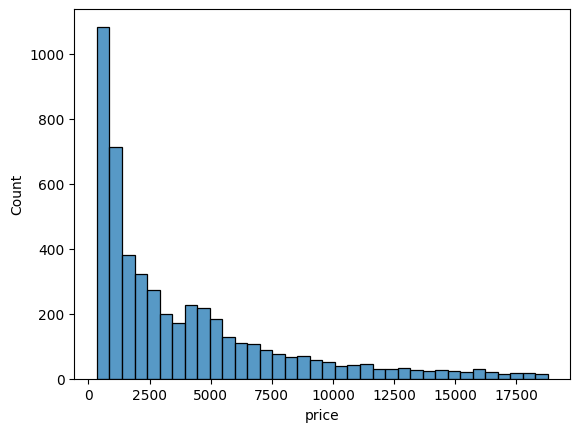

In [8]:
sns.histplot(df["price"])

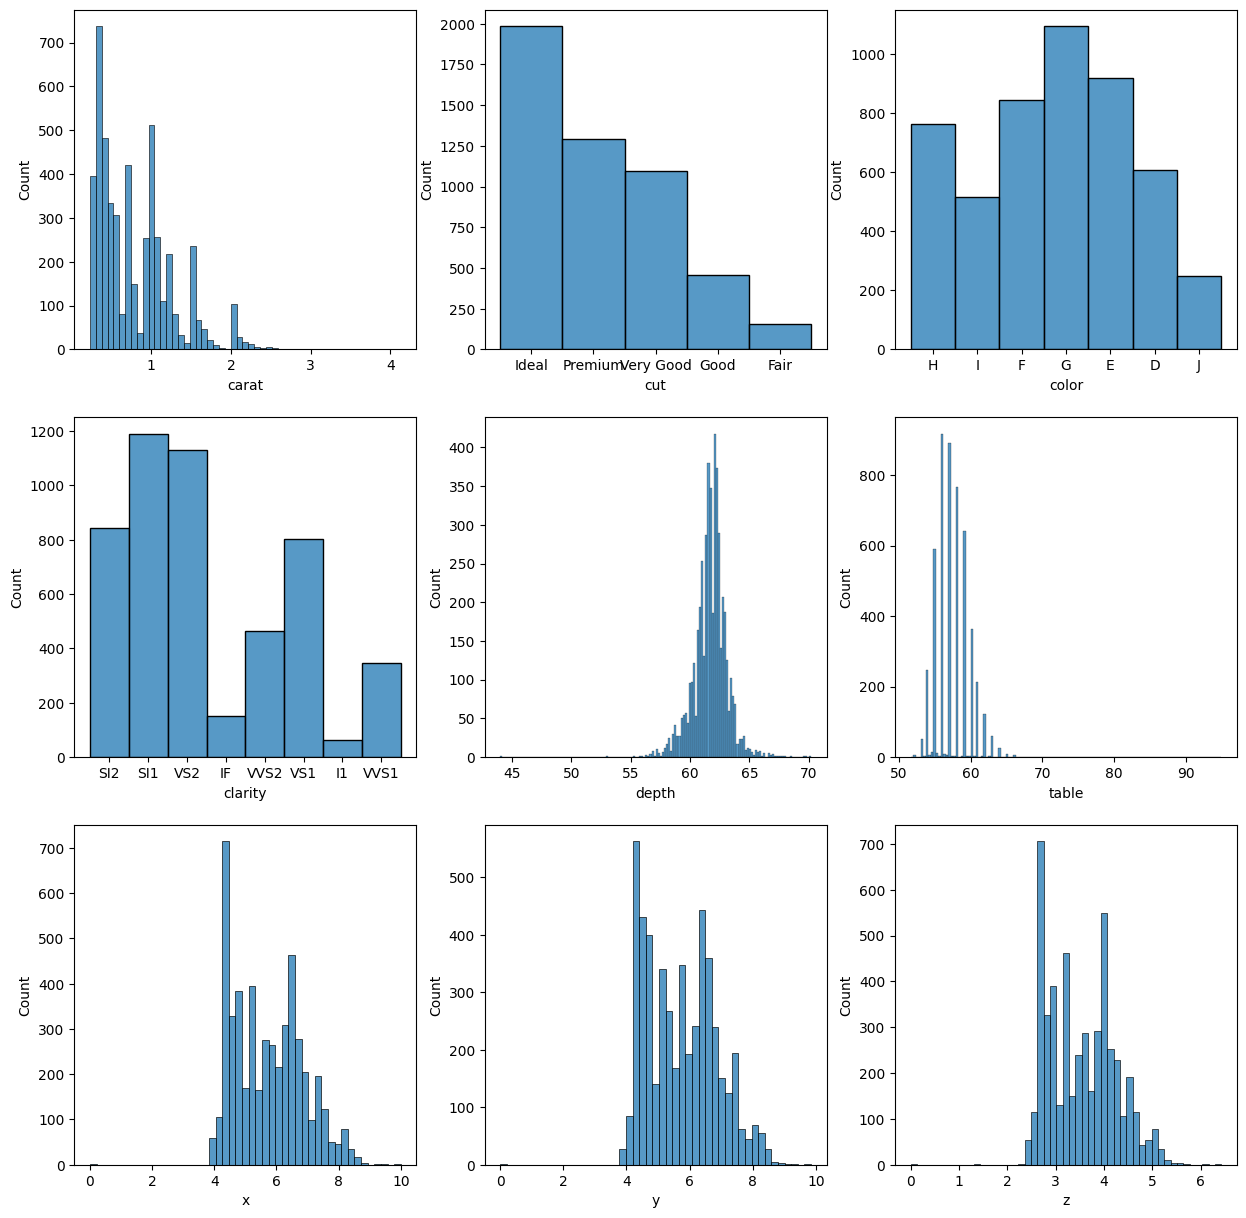

In [9]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, [el for el in df.columns if el != "price"]):
  sns.histplot(df[col], ax = ax)
  #ax.set_title(col)

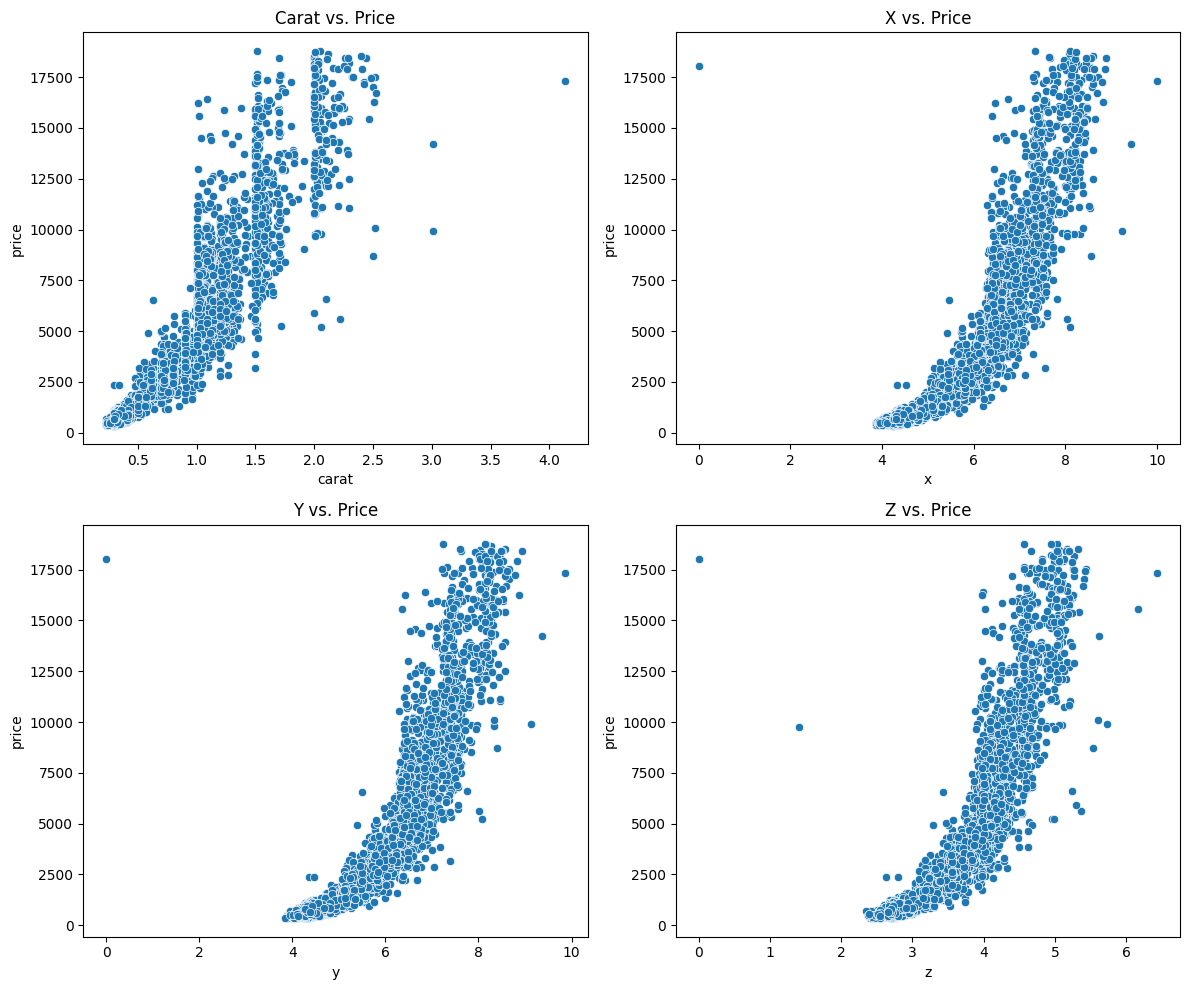

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.scatterplot(data=df, x="carat", y="price", ax=axes[0, 0])
sns.scatterplot(data=df, x="x", y="price", ax=axes[0, 1])
sns.scatterplot(data=df, x="y", y="price", ax=axes[1, 0])
sns.scatterplot(data=df, x="z", y="price", ax=axes[1, 1])

axes[0, 0].set_title('Carat vs. Price')
axes[0, 1].set_title('X vs. Price')
axes[1, 0].set_title('Y vs. Price')
axes[1, 1].set_title('Z vs. Price')

plt.tight_layout() 
plt.show()

There is a datapoint with x,y,z values equal to 0, as well as one with a large carat value and a data point with a very small z value. Let's investigate them.

In [11]:
df[(df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,z-depth,table-width
4321,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0,0.0,0.0


In [12]:
df = df[~((df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0))]

In [13]:
df[df["carat"] == df["carat"].max()]

,carat,cut,color,clarity,depth,table,price,x,y,z,z-depth,table-width
3299,4.13,Fair,H,I1,64.8,61.0,17329,10.0,9.85,6.43,4.16664,6.1


In [14]:
df = df[~(df["carat"] == df["carat"].max())]

In [15]:
df[df["z"] == df["z"].min()]

,carat,cut,color,clarity,depth,table,price,x,y,z,z-depth,table-width
1776,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41,0.85587,4.0936


In [16]:
df = df[~(df["z"] == df["z"].min())]

Since in the previous plot it seems there is an exponential relationship between the 4 continuous variables and the price, let's apply a logarithmic transformation to better investigate them.

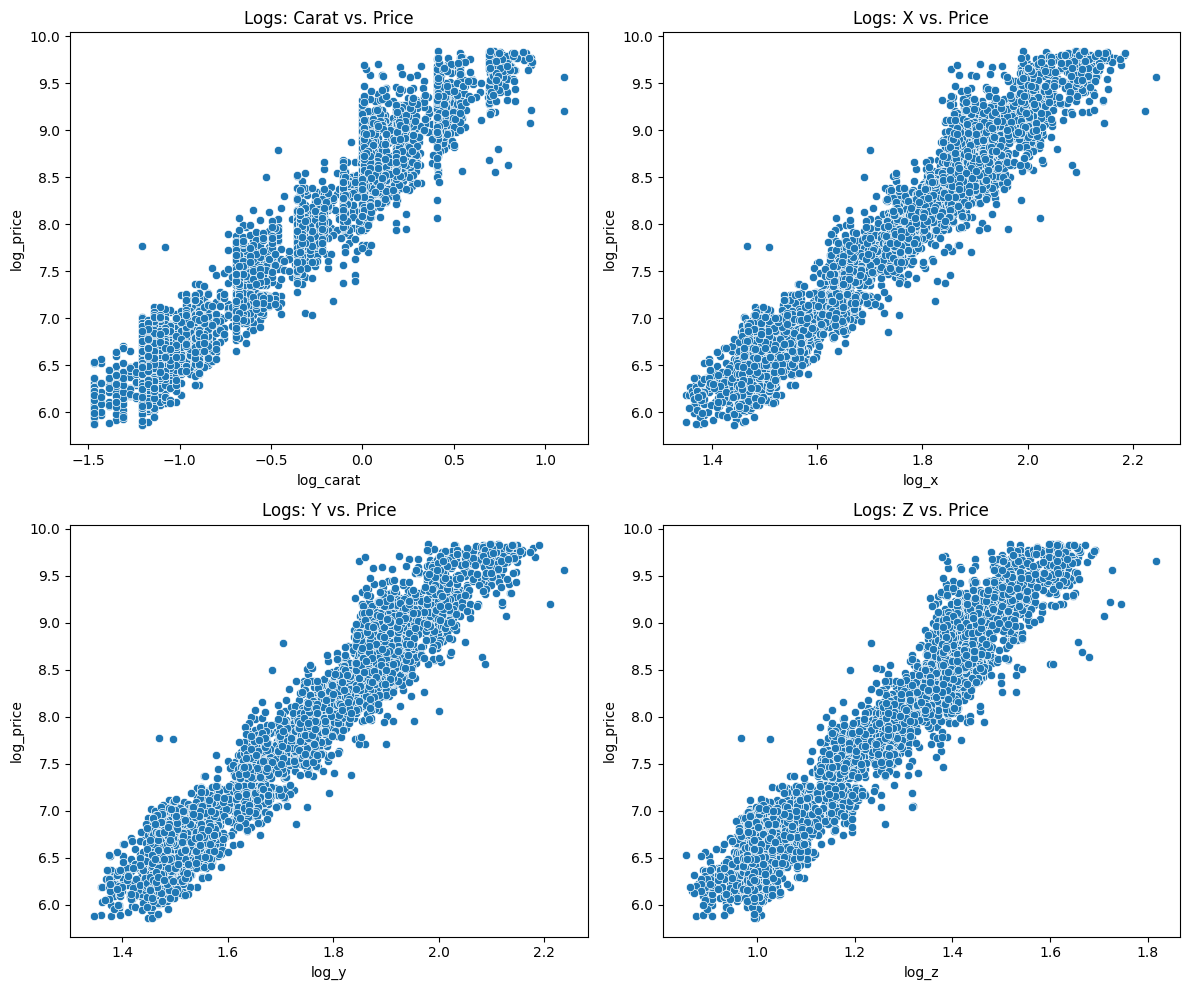

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for col in ["carat","x","y","z","price"]:
    df.loc[:, f"log_{col}"] = np.log(df[col])

sns.scatterplot(data=df, x="log_carat", y="log_price", ax=axes[0, 0])
sns.scatterplot(data=df, x="log_x", y="log_price", ax=axes[0, 1])
sns.scatterplot(data=df, x="log_y", y="log_price", ax=axes[1, 0])
sns.scatterplot(data=df, x="log_z", y="log_price", ax=axes[1, 1])

axes[0, 0].set_title('Logs: Carat vs. Price')
axes[0, 1].set_title('Logs: X vs. Price')
axes[1, 0].set_title('Logs: Y vs. Price')
axes[1, 1].set_title('Logs: Z vs. Price')

plt.tight_layout() 
plt.show()

In a logarithmic scale, there is a linear relationship among them, this will be used to provide a baseline for future models.

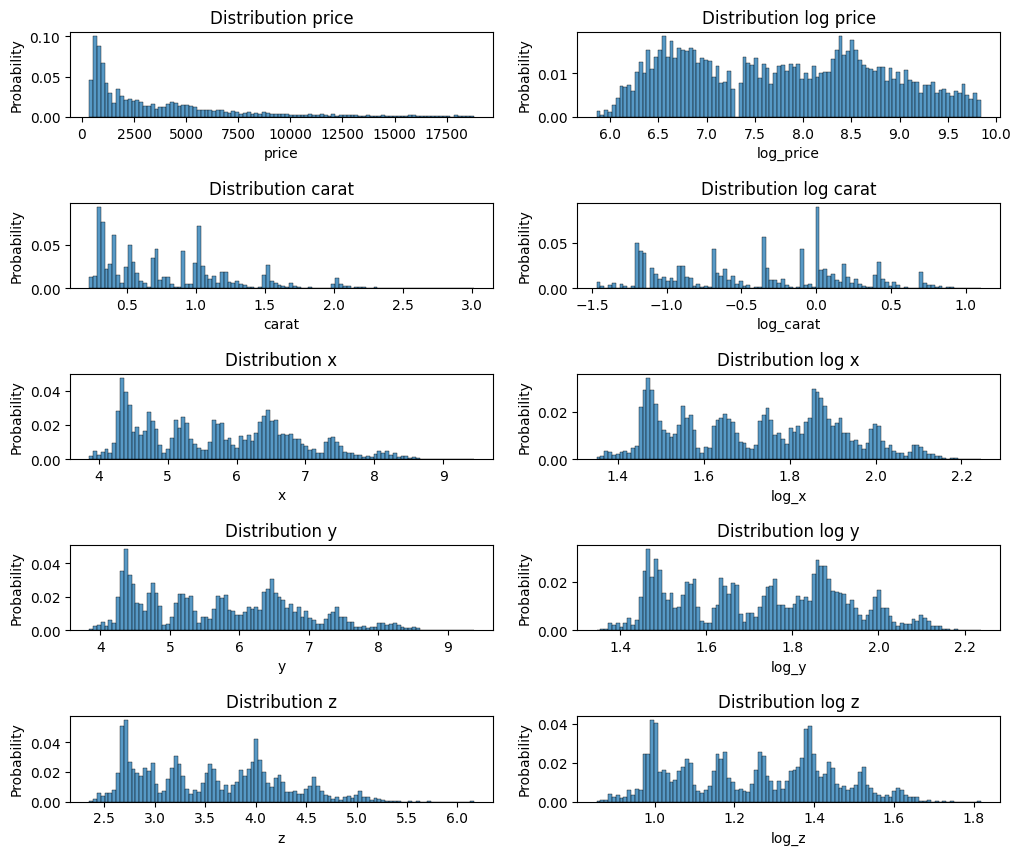

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=1)

_columns = ["price","carat","x","y","z"]
for i in range(len(_columns)):
    col = _columns[i]
    sns.histplot(data=df, x=col, stat="probability", bins=100, ax=axes[i][0])
    sns.histplot(data=df, x=f"log_{col}", stat="probability", bins=100, ax=axes[i][1])
    axes[i, 0].set_title(f'Distribution {col}')
    axes[i, 1].set_title(f'Distribution log {col}')

Looking for information online, I have read about the importance of carat when assesing the price of diamonds. Basically, different ranges of carats determine different level of prices. To test this, I will run a smal regression tree in order having as output variable the price and as input only the carat.

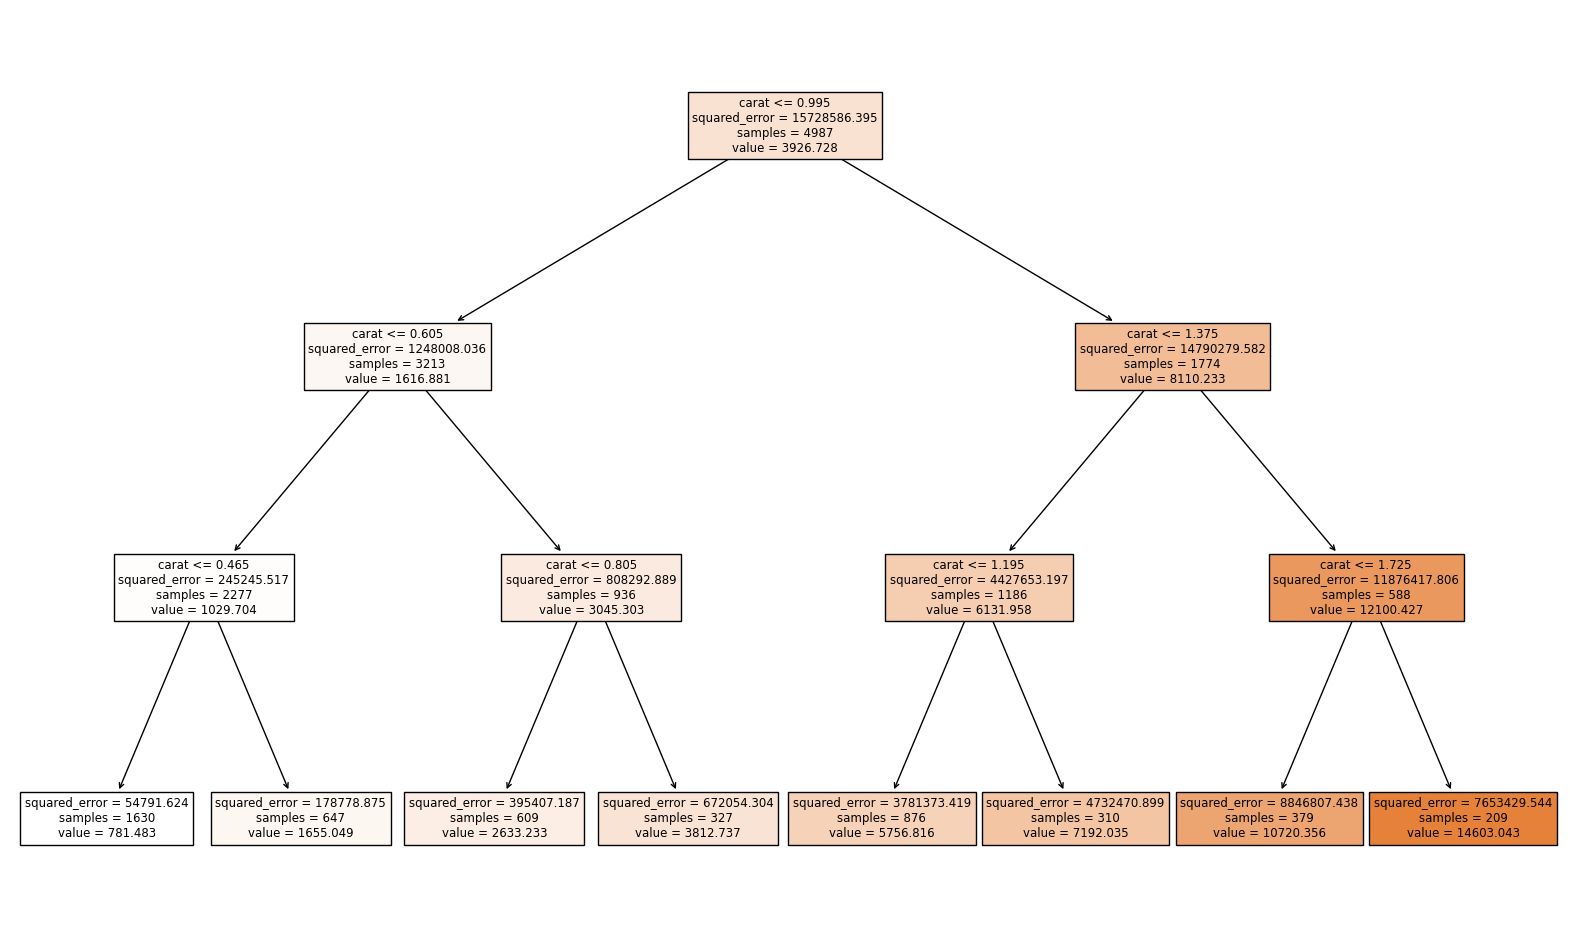

Splitting points: [0.4650000035762787, 0.6050000190734863, 0.8050000071525574, 0.9950000047683716, 1.1950000524520874, 1.375, 1.725000023841858]


In [19]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

X = df[['carat']]
y = df['price']

model = DecisionTreeRegressor(max_depth=3)  
model.fit(X, y)

plt.figure(figsize=(20, 12))
from sklearn.tree import plot_tree
plot_tree(model, feature_names=['carat'], filled=True)
plt.show()
# Extracting splitting points from the decision tree
splitting_points = sorted(model.tree_.threshold[model.tree_.threshold != -2])

# Printing splitting points
print("Splitting points:", splitting_points)

Now, I wanna compare the distributions of the output variable across different ranges of carat to check whether there are differences.

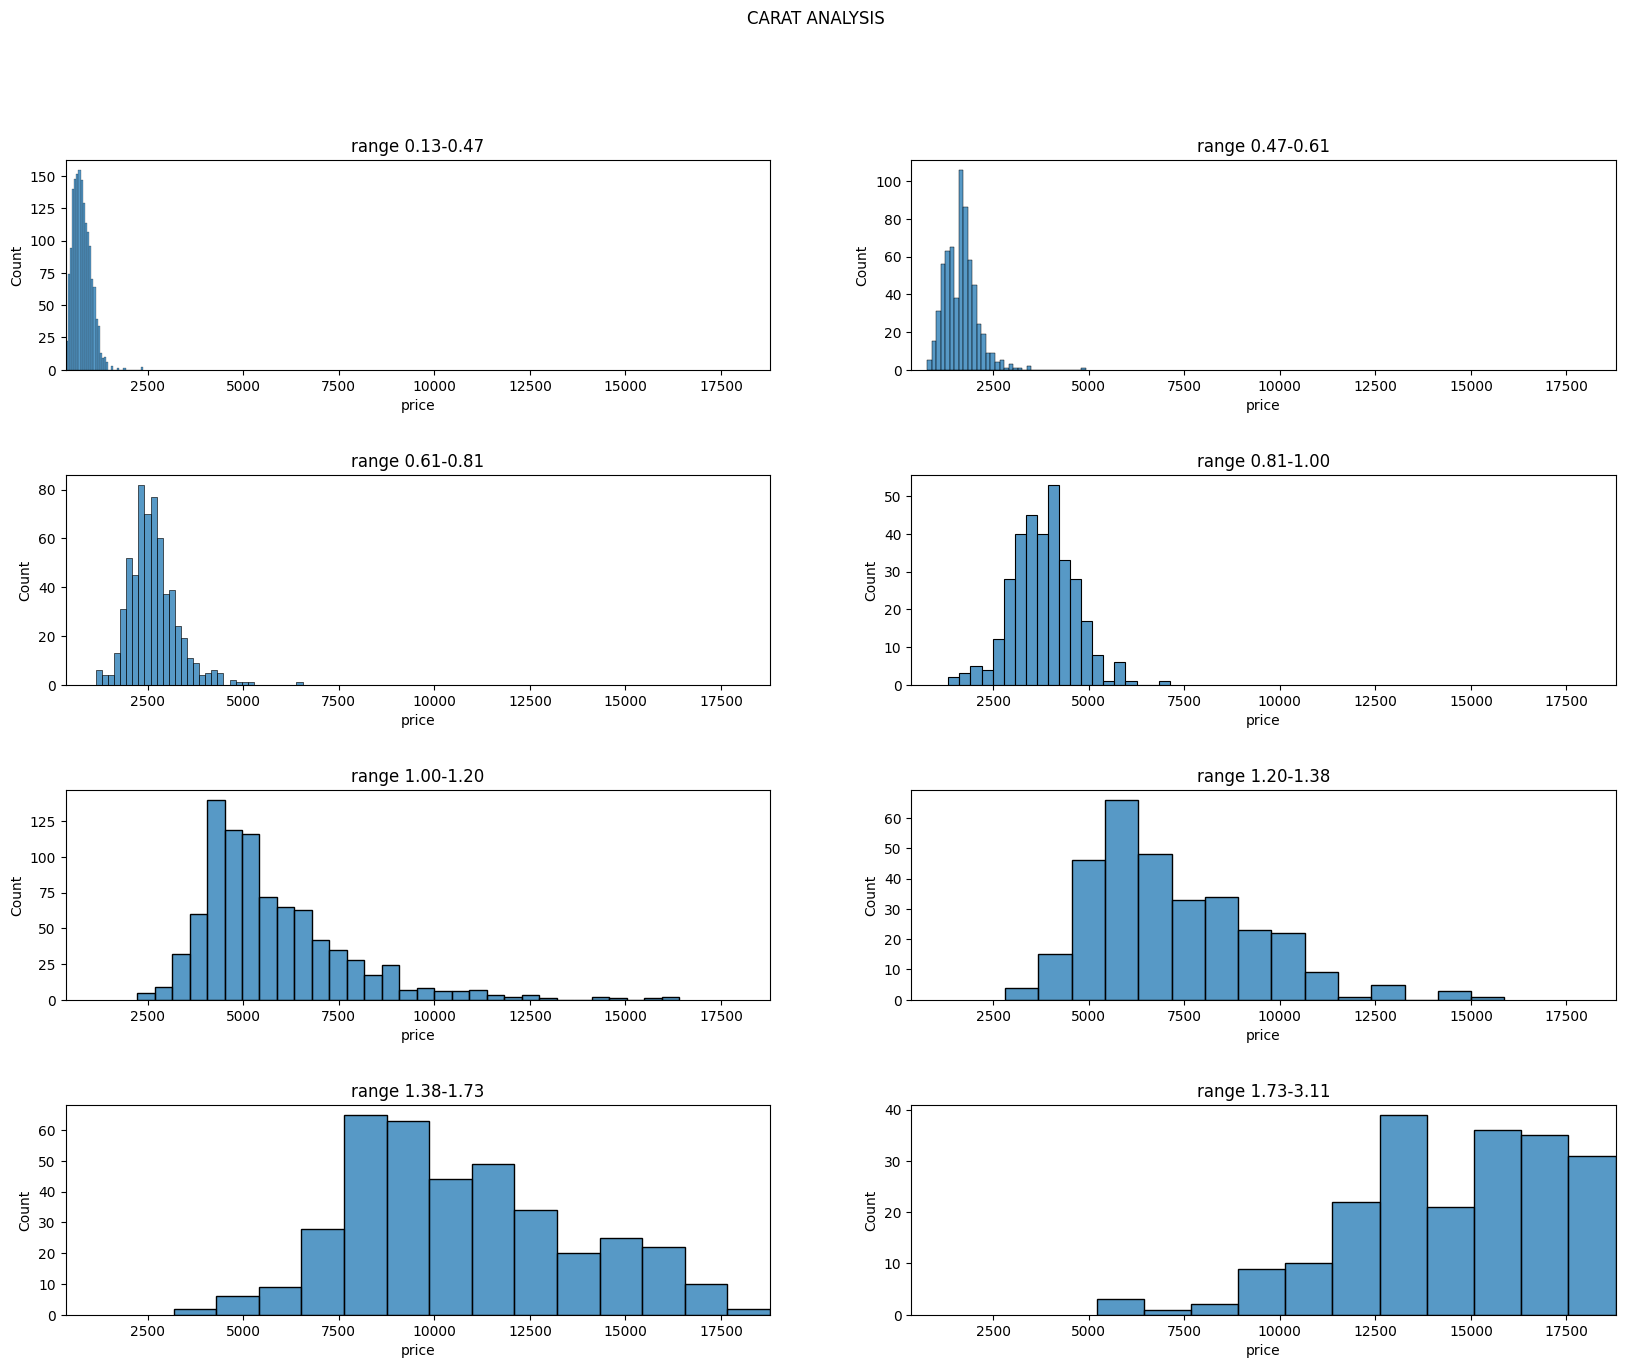

In [20]:
n_points = len(splitting_points)
fig, axes = plt.subplots(nrows = 4, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("CARAT ANALYSIS")
#GET ALL THE THRESHOLDS
_eps: float = 0.1
_limits_: list[tuple] = [(df["carat"].min() - _eps, splitting_points[0])]\
    + [(splitting_points[i], splitting_points[i+1]) for i in range(len(splitting_points)-1)]\
        + [(splitting_points[-1], df["carat"].max()+_eps)]

for ax, _thresholds in zip(axes, _limits_):
  ax.set_xlim(df['price'].min(), df['price'].max())
  lb, ub = _thresholds #define lower and upper bound of the range
  sns.histplot(df[(df["carat"] >= lb) & (df["carat"] < ub)]["price"], ax = ax)
  ax.set_title(f"range {lb:.2f}-{ub:.2f}")

It seems that the carat is already a good variable to determine different ranges of prices, this shows it will be important to consider it in future analysis.

Moreover, other "Cs" should have an important impact in determing the price, let's test this by comparing the distribution of the price across different values of each "Cs" variable.

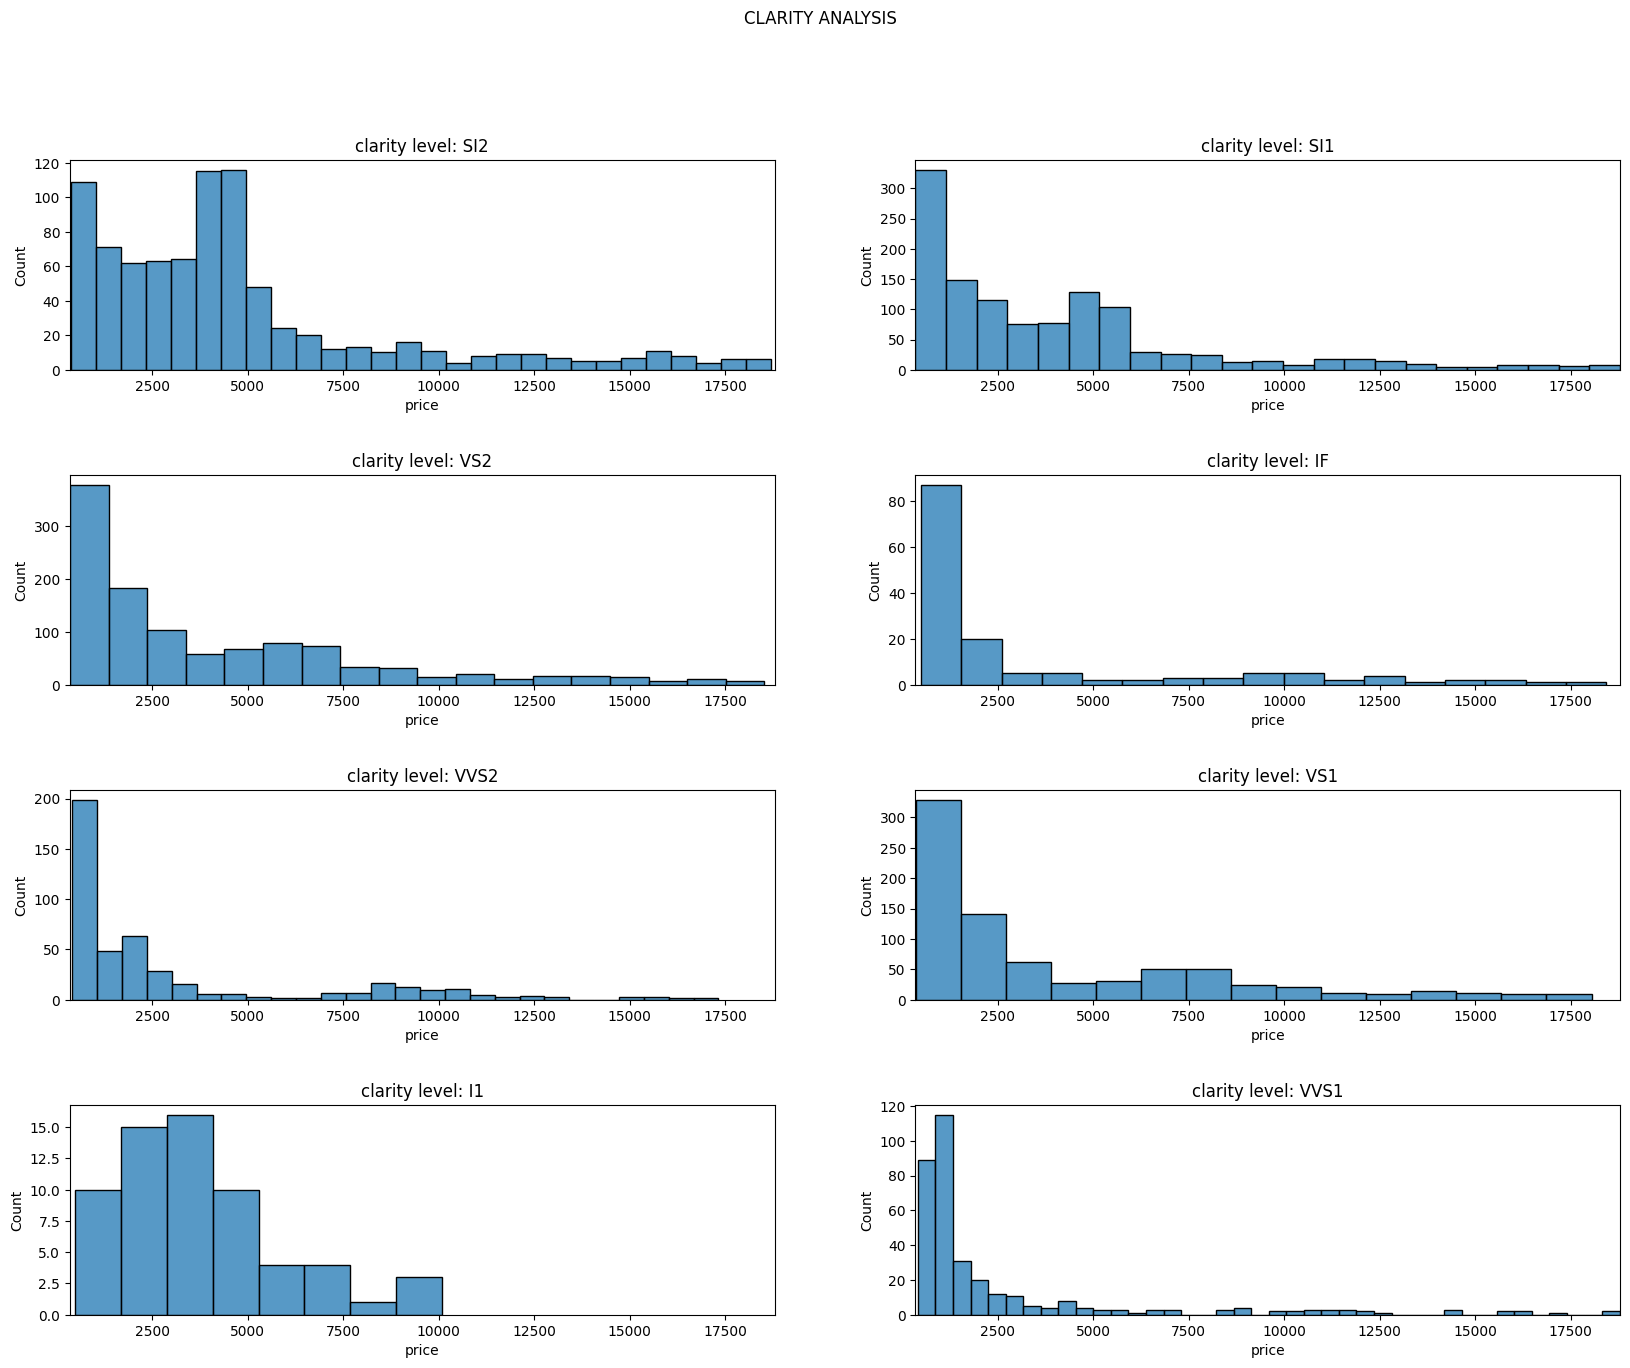

In [21]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("CLARITY ANALYSIS")
#GET ALL THE THRESHOLDS
_col = "clarity"

for ax, _clarity_level in zip(axes, df[_col].unique()):
  ax.set_xlim(df['price'].min(), df['price'].max())
  sns.histplot(df[df[_col] == _clarity_level]["price"], ax = ax)
  ax.set_title(f"{_col} level: {_clarity_level}")

Considered alone, this variable doesn't seem able to clearly capture different level of prices

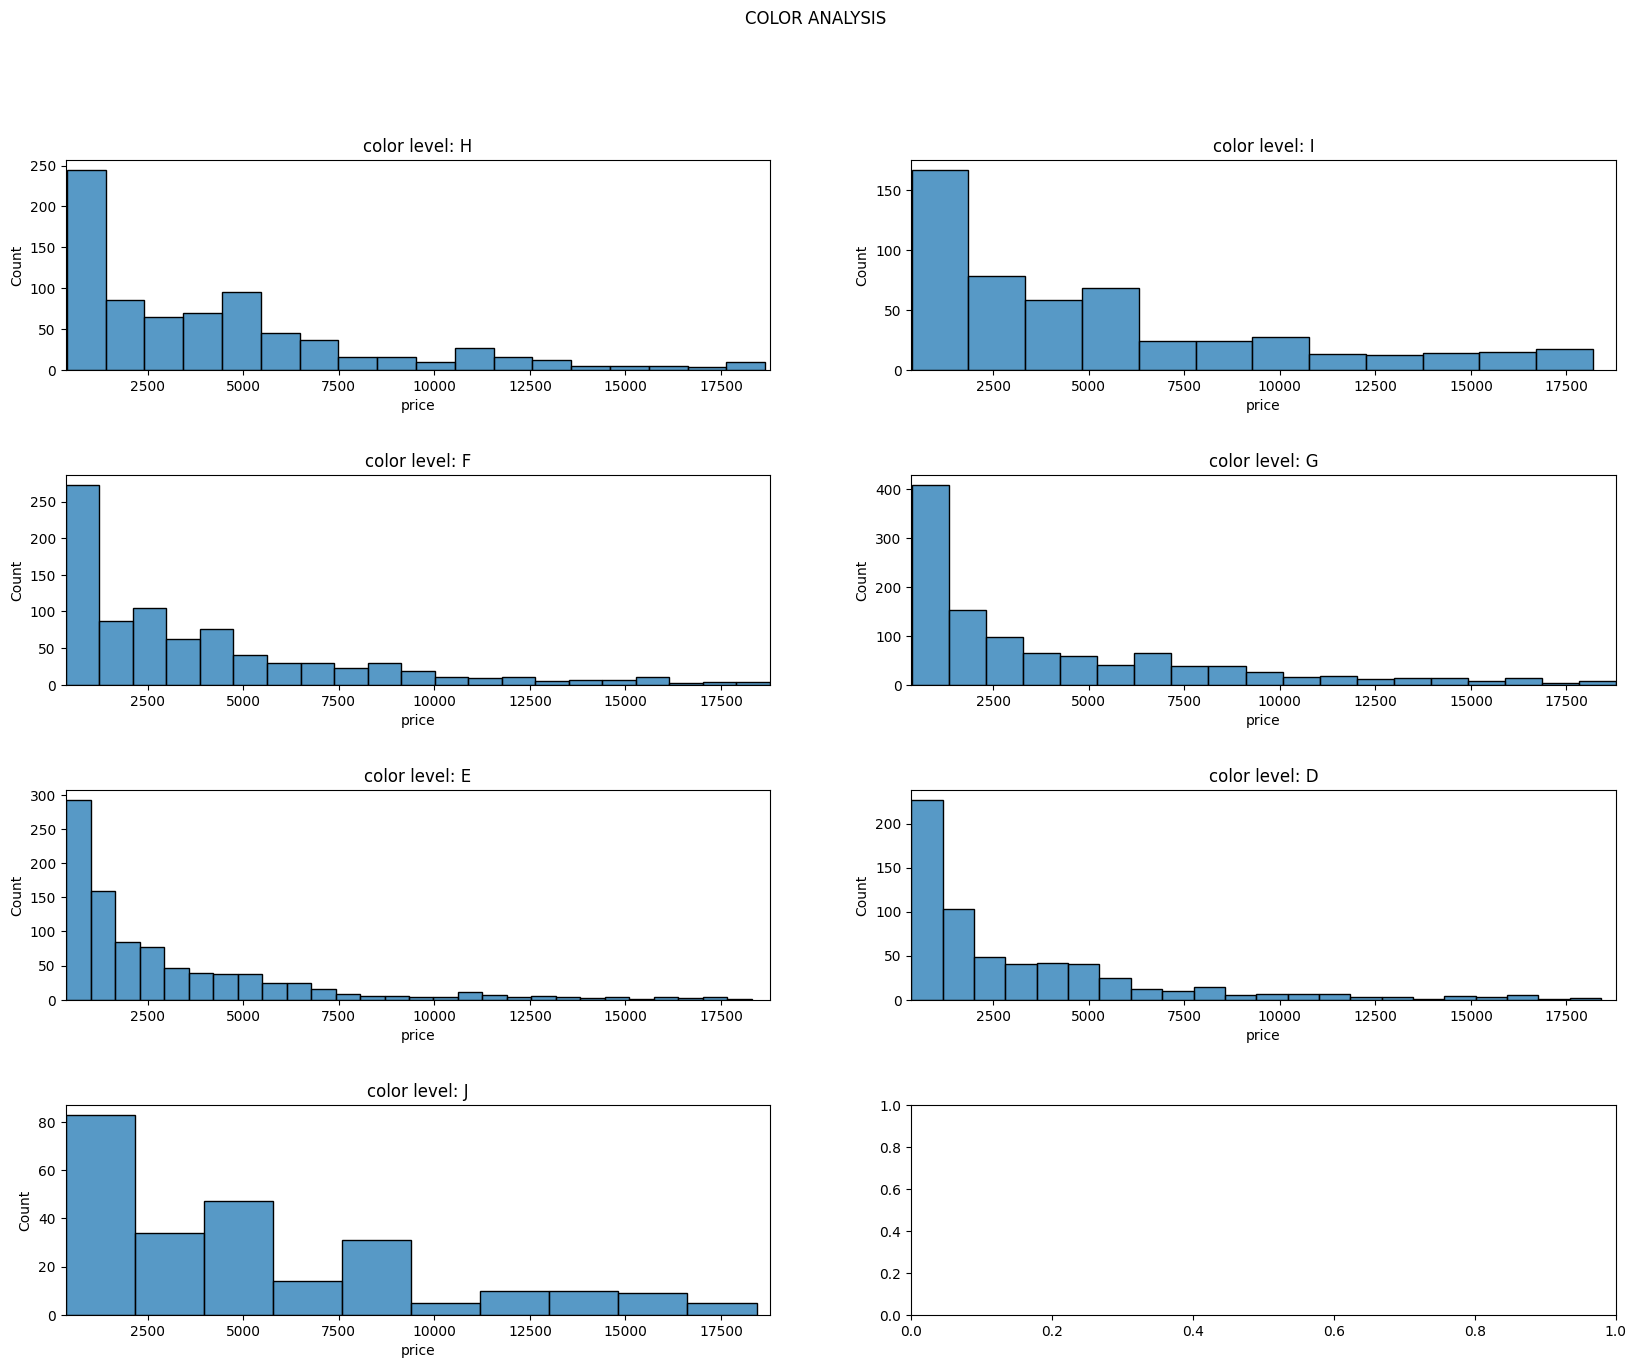

In [22]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("COLOR ANALYSIS")
#GET ALL THE THRESHOLDS
_col = "color"

for ax, _color_level in zip(axes, df[_col].unique()):
  ax.set_xlim(df['price'].min(), df['price'].max())
  sns.histplot(df[df[_col] == _color_level]["price"], ax = ax)
  ax.set_title(f"{_col} level: {_color_level}")

Considered alone, this variable doesn't seem able to clearly capture different level of prices

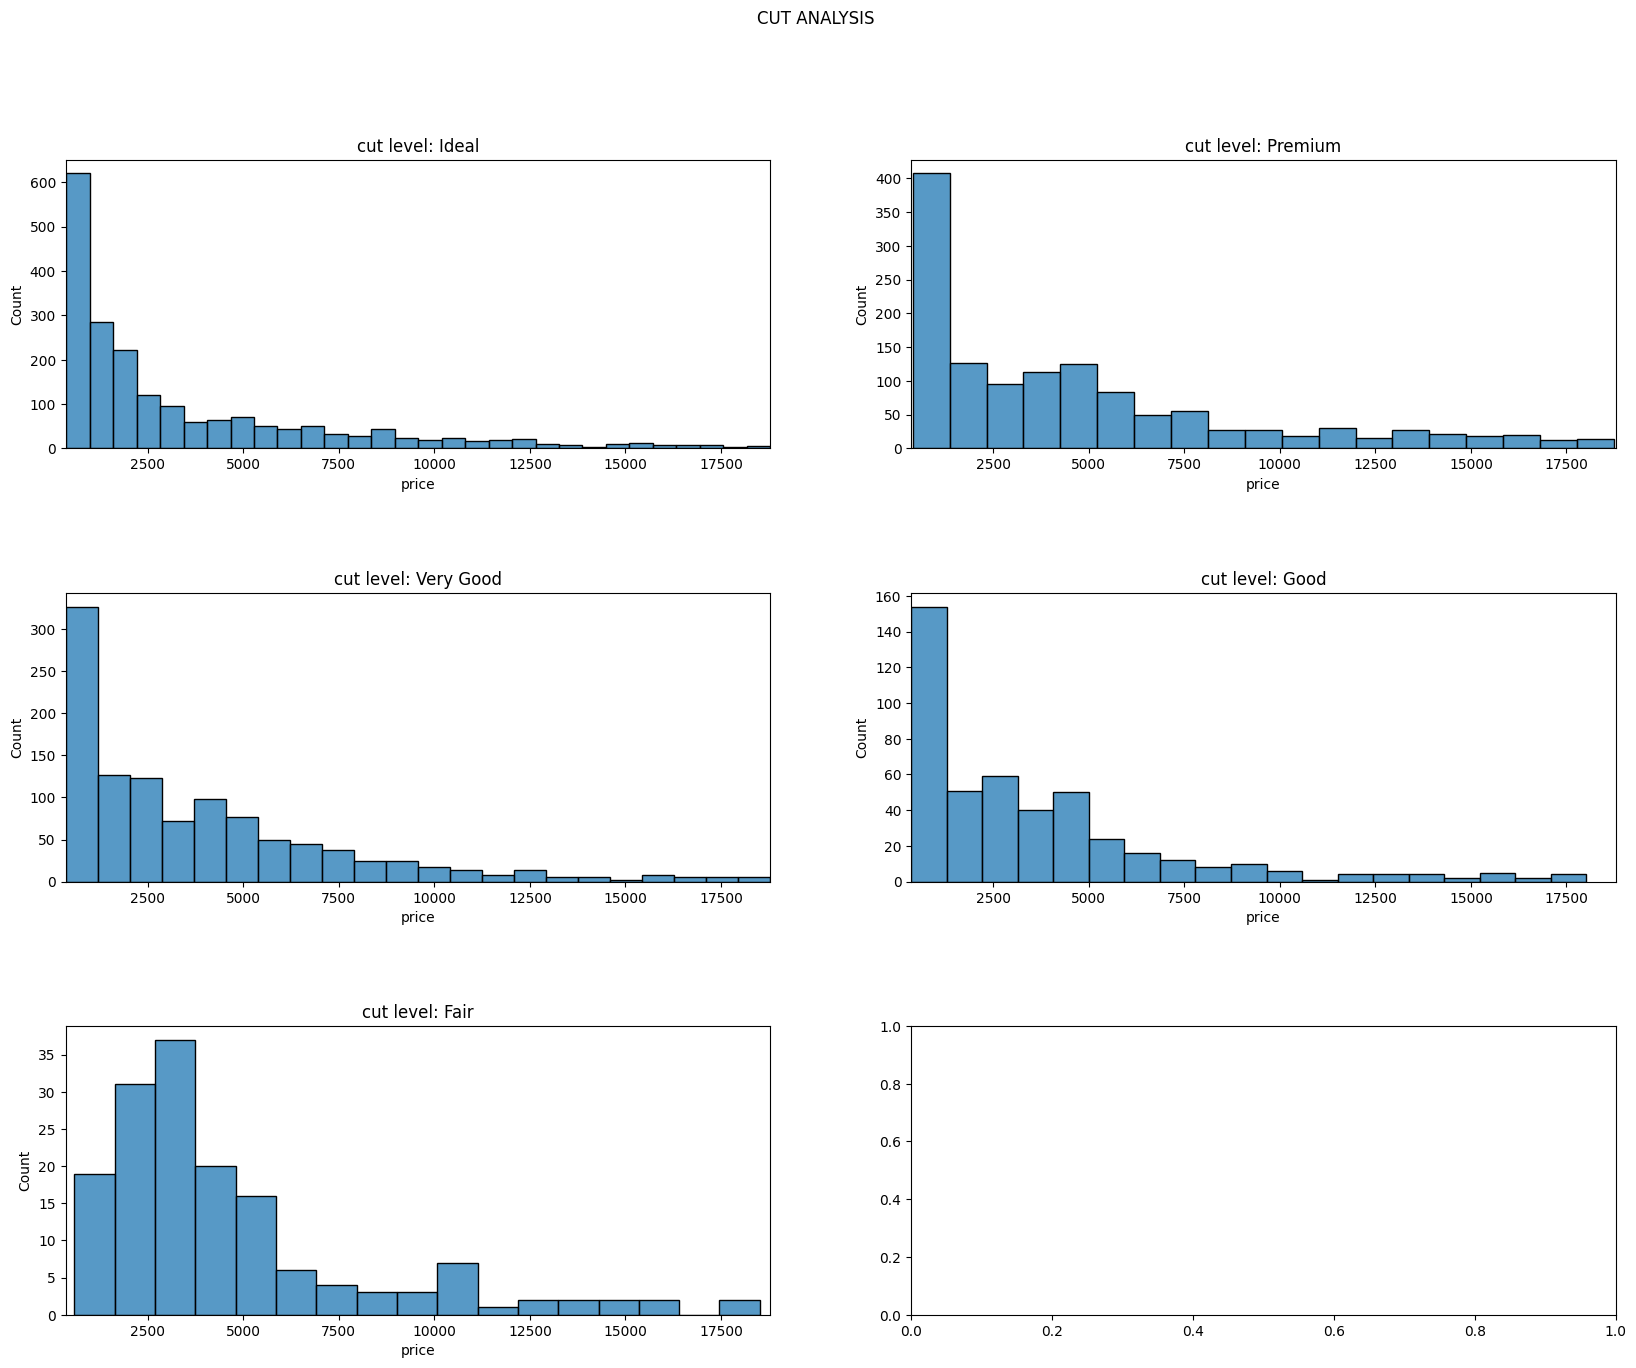

In [23]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("CUT ANALYSIS")
#GET ALL THE THRESHOLDS
_col = "cut"

for ax, _cut_level in zip(axes, df[_col].unique()):
  ax.set_xlim(df['price'].min(), df['price'].max())
  sns.histplot(df[df[_col] == _cut_level]["price"], ax = ax)
  ax.set_title(f"{_col} level: {_cut_level}")

Considered alone, this variable doesn't seem able to clearly capture different level of prices

To conclude, among the 4cs, only "carat" seem able to distinguish level of prices. However, this analysis is not enough for exluding the other "Cs", because it could be that the interaction among them will be able to capture nice behaviors. Indeed, having a look online (https://www.gcalusa.com/affect-price.html), for instance they mention how the effect of color on prices change across different levels of clarity. 

In [24]:
df["vol"] = df["x"]*df["y"]*df["z"]

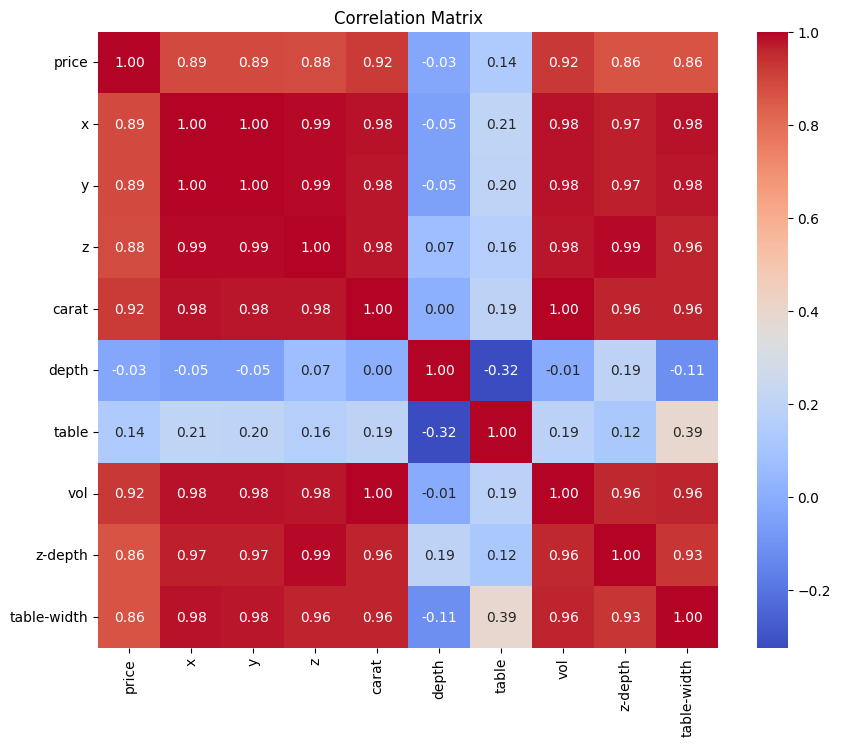

In [25]:
correlation_matrix = df[["price","x","y","z","carat","depth", "table", "vol", 'z-depth', 'table-width']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def custom_score_function(y_log_true, y_log_pred):
    return np.sqrt(np.mean((np.exp(y_log_true) - np.exp(y_log_pred)) ** 2)) 

custom_scorer = make_scorer(custom_score_function)

X_log = df[["log_carat","log_x","log_y","log_z"]]
y_log = df["log_price"]

linear_model = LinearRegression()

# Perform cross-validation
# Here, we use 5-fold cross-validation, you can change it as needed
scores = cross_val_score(linear_model, X_log, y_log, cv=10, scoring=custom_scorer)

print(f"Average RMSE across folds: {np.mean(scores)}")

Average RMSE across folds: 1561.7117601904138


In [27]:
df.loc[:,"log_table_width"] = np.log(df["table-width"])
df.loc[:,"log_z-depth"] = np.log(df["z-depth"])

In [92]:
data_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity']).astype(float)

In [86]:
X_log = data_encoded[["log_carat","log_x","log_y","log_z", "log_table_width", "log_z-depth", 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']]

y_log = data_encoded["log_price"]

linear_model = LinearRegression()

# Perform cross-validation
# Here, we use 5-fold cross-validation, you can change it as needed
scores = cross_val_score(linear_model, X_log, y_log, cv=10, scoring=custom_scorer)

print(f"Average RMSE across folds: {np.mean(scores)}")

Average RMSE across folds: 824.4454889677684


In [87]:
X = data_encoded[["carat","x","y","z", "table-width", "z-depth", 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']]

y = data_encoded["price"]

linear_model = LinearRegression()

def custom_score_function(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

custom_scorer = make_scorer(custom_score_function)

# Perform cross-validation
# Here, we use 5-fold cross-validation, you can change it as needed
scores = cross_val_score(linear_model, X, y, cv=10, scoring=custom_scorer)
print(f"Average RMSE across folds: {np.mean(scores)}")

Average RMSE across folds: 1109.6458965221514


The interisting insight is that by running the same model in a log scale it improves a lot the performances.

In [93]:
for col in ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']:
    data_encoded.loc[:,f"{col}_carat"] = data_encoded[col]*data_encoded["carat"]

for col in ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']:
    data_encoded.loc[:,f"{col}_log_carat"] = data_encoded[col]*data_encoded["log_carat"]

In [95]:
X_log = data_encoded[["log_carat","log_x","log_y","log_z", "log_table_width", "log_z-depth", 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'cut_Fair_log_carat', 'cut_Good_log_carat', 'cut_Ideal_log_carat',
       'cut_Premium_log_carat', 'cut_Very Good_log_carat', 'color_D_log_carat',
       'color_E_log_carat', 'color_F_log_carat', 'color_G_log_carat',
       'color_H_log_carat', 'color_I_log_carat', 'color_J_log_carat',
       'clarity_I1_log_carat', 'clarity_IF_log_carat', 'clarity_SI1_log_carat',
       'clarity_SI2_log_carat', 'clarity_VS1_log_carat',
       'clarity_VS2_log_carat', 'clarity_VVS1_log_carat',
       'clarity_VVS2_log_carat']]

y_log = data_encoded["log_price"]

linear_model = LinearRegression()

def custom_score_function(y_log_true, y_log_pred):
    return np.sqrt(np.mean((np.exp(y_log_true) - np.exp(y_log_pred)) ** 2)) 

custom_scorer = make_scorer(custom_score_function)
# Perform cross-validation
# Here, we use 5-fold cross-validation, you can change it as needed
scores = cross_val_score(linear_model, X_log, y_log, cv=10, scoring=custom_scorer)

print(f"Average RMSE across folds: {np.mean(scores)}")

Average RMSE across folds: 803.5759124334143


In [97]:
X = data_encoded[["carat","x","y","z", "table-width", "z-depth", 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'cut_Fair_carat',
       'cut_Good_carat', 'cut_Ideal_carat', 'cut_Premium_carat',
       'cut_Very Good_carat', 'color_D_carat', 'color_E_carat',
       'color_F_carat', 'color_G_carat', 'color_H_carat', 'color_I_carat',
       'color_J_carat', 'clarity_I1_carat', 'clarity_IF_carat',
       'clarity_SI1_carat', 'clarity_SI2_carat', 'clarity_VS1_carat',
       'clarity_VS2_carat', 'clarity_VVS1_carat', 'clarity_VVS2_carat']]

y = data_encoded["price"]

linear_model = LinearRegression()

def custom_score_function(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

custom_scorer = make_scorer(custom_score_function)

# Perform cross-validation
# Here, we use 5-fold cross-validation, you can change it as needed
scores = cross_val_score(linear_model, X, y, cv=10, scoring=custom_scorer)
print(f"Average RMSE across folds: {np.mean(scores)}")

Average RMSE across folds: 820.9584823691139


#### XGBOOST REGRESSOR

In [143]:
import xgboost as xgb
from xgboost import cv

X = data_encoded[["carat","x","y","z", "table-width", "z-depth", 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']]

y = data_encoded["price"]

data = xgb.DMatrix(X, label=y)

params = {"objective":"reg:absoluteerror","eval_metric":"rmse",'learning_rate': 0.1,
                'max_depth': 6, 'alpha': 10}

xgb_cv = cv(dtrain=data, params=params, nfold=10,
                    num_boost_round=3000, early_stopping_rounds=100, metrics="rmse", as_pandas=True, seed=123)

print(f"Best RMSE across folds: {np.min(xgb_cv['test-rmse-mean'])}")

Best RMSE across folds: 659.0925092539577


#### Catboost Regressor

In [144]:
from catboost import Pool, cv

In [151]:
x = df[['carat', 'cut', 'color', 'clarity', 'x', 'y',
       'z', 'z-depth', 'table-width']]
y = df["price"]

In [152]:
cv_dataset = Pool(data=x,
                  label=y,
                  cat_features=[col for col in x.columns if x[col].dtype == "O"])

params = {"iterations": 3000,
          "depth": 6,
          "loss_function": "RMSE",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=10)

Training on fold [0/10]

bestTest = 586.5983557
bestIteration = 772

Training on fold [1/10]

bestTest = 580.9778627
bestIteration = 683

Training on fold [2/10]

bestTest = 581.3638232
bestIteration = 404

Training on fold [3/10]

bestTest = 657.5984856
bestIteration = 1394

Training on fold [4/10]

bestTest = 617.0325167
bestIteration = 597

Training on fold [5/10]

bestTest = 527.4639145
bestIteration = 1850

Training on fold [6/10]

bestTest = 632.219352
bestIteration = 1447

Training on fold [7/10]

bestTest = 571.4684954
bestIteration = 1608

Training on fold [8/10]

bestTest = 641.7325605
bestIteration = 945

Training on fold [9/10]

bestTest = 625.0082897
bestIteration = 960



In [153]:
print(f"Best RMSE across folds: {np.min(scores['test-RMSE-mean'])}")

Best RMSE across folds: 605.6873354572772


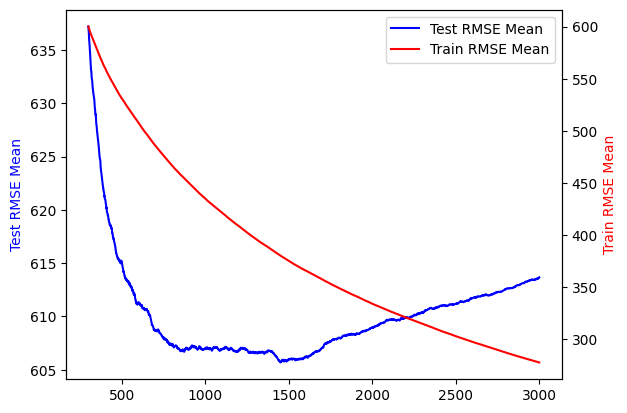

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

_limit = int(params["iterations"]*0.9)
# Plotting the first line on the primary y-axis (left)
ax1.plot(scores["test-RMSE-mean"].iloc[-_limit:], color='blue', label='Test RMSE Mean')
ax1.set_ylabel('Test RMSE Mean', color='blue')

# Creating a second y-axis (right)
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis (right)
ax2.plot(scores["train-RMSE-mean"].iloc[-_limit:], color='red', label='Train RMSE Mean')
ax2.set_ylabel('Train RMSE Mean', color='red')

# Show legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()


TAKE A RANDOM SPLIT TO CHECK THE FEATURE IMPORTANCE

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1066)

In [157]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

cat_features=[col for col in x.columns if x[col].dtype == "O"]

train_pool = Pool(X_train, y_train, cat_features)
test_pool = Pool(X_test, y_test, cat_features)

model = CatBoostRegressor(iterations=1000, max_depth=6, random_seed=1066)
model.fit(X_train, y_train, eval_set=test_pool, cat_features=cat_features, use_best_model=True, early_stopping_rounds=10, verbose=False)

rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(f"RMSE: {rmse:.4f}")

RMSE: 616.4636


Text(0.5, 1.0, 'Feature Importance')

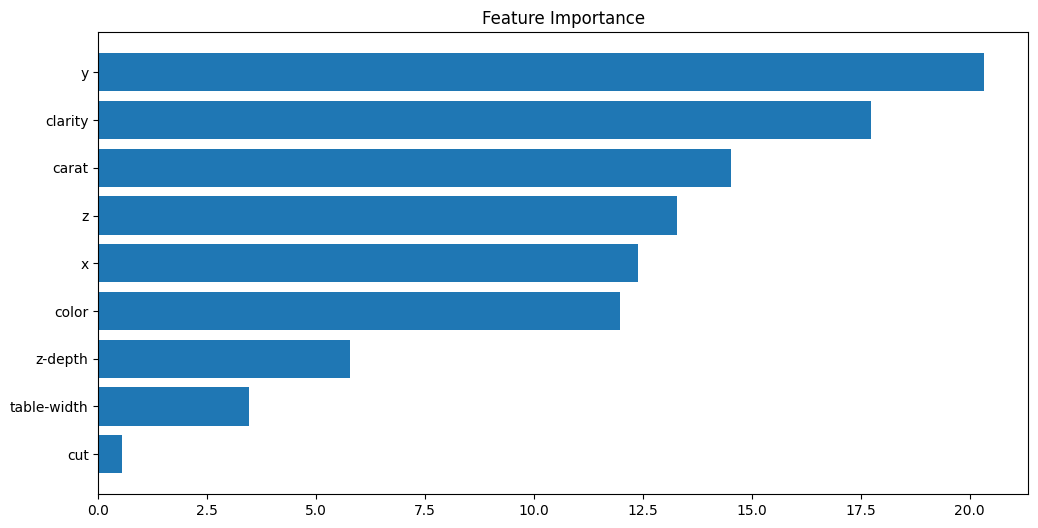

In [158]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


Try to run the same model but on log levels

In [166]:
import tqdm
x = df[['log_carat', 'cut', 'color', 'clarity', 'log_x', 'log_y', 'log_z',
       'log_z-depth', 'log_table_width']]

y = df["log_price"]

rmse_list = list()
for i in tqdm.tqdm(range(100)):
       X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

       cat_features=[col for col in x.columns if x[col].dtype == "O"]

       train_pool = Pool(X_train, y_train, cat_features)
       test_pool = Pool(X_test, y_test, cat_features)

       model = CatBoostRegressor(iterations=1000, max_depth=6, random_seed=1066)
       model.fit(X_train, y_train, eval_set=test_pool, cat_features=cat_features, use_best_model=True, early_stopping_rounds=10, verbose=False)

       rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(model.predict(X_test))))
       rmse_list.append(rmse)
       #print(f"RMSE: {rmse:.4f}")
print(f"average RMSE: {np.mean(rmse_list):.4f}")

100%|██████████| 100/100 [01:29<00:00,  1.12it/s]

average RMSE: 596.0345


Comparing the results it seems that using log-levels improves the performance of catboost.

Overall, catboost seems the best model. Let's train it and save it.

In [197]:
import json
x = df[['log_carat', 'cut', 'color', 'clarity', 'log_x', 'log_y', 'log_z',
       'log_z-depth', 'log_table_width']]

y = df["log_price"]

cat_features=[col for col in x.columns if x[col].dtype == "O"]

train_pool = Pool(x, y, cat_features)

model = CatBoostRegressor(iterations=1000, max_depth=6, random_seed=1066)
params_ = model.get_params()
model.fit(X_train, y_train, cat_features=cat_features, use_best_model=False, early_stopping_rounds=10, verbose=False)
parmas = model.get_all_params()["learning_rate"]
model.save_model("best_model",
           format="cbm",
           export_parameters=None,
           pool=None)

# Convert and write JSON object to file
with open("best_model_params.json", "w") as outfile: 
    json.dump(params, outfile)

Loading Test

In [195]:
with open("best_model_params.json", "r") as inputfile: 
    params = json.load(inputfile)
model = CatBoostRegressor(**params_)
model.load_model("best_model",
           format="cbm")